In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
from sklearn import model_selection
%matplotlib inline

In [ ]:
data=pd.read_csv('pg_recommendation_data.csv')

In [ ]:
data.head()

,mentee_major,mentee_help_topics,mentee_experitse,mentor_major,mentor_help_topics,mentor_experitse,final_match
0,[Accounting and Financial Management],"[Life Skills, Cover Letter Review, Career Plan...",[Accounting],[Accounting and Financial Management],"[Parenting vs. Career, Career / Industry Trends]","[Finance, Accounting]",1
1,[Information Systems Management],"[Working Overseas, Life Skills, Startups, Care...","[Food & Restaurants, Law, Computer - IT Servic...","[Information Systems Management, Project Manag...","[Leadership Skills, Working Overseas, Personal...","[Trade (Wholesale), Government / Public Admin,...",0
2,"[Cybersecurity Technology, Computer Networks a...","[Leadership Skills, Personal and Professional ...","[Military & Defense, Technology, Computer - IT...","[Cybersecurity Technology, Computer Networks a...","[Management, Resume / CV Review, Career / Indu...","[Government / Public Admin, Computer - IT Serv...",1
3,[Masters of Human Resources Management],[None],[Human Resources],[Business Administration],"[Leadership Skills, Life Skills, Interviewing ...","[Human Resources, Advertising / Marketing, Tel...",0
4,[Sociology],"[Leadership Skills, Life Skills, Management, C...",[Healthcare],[Business Administration],"[Leadership Skills, Working Overseas, Personal...","[Human Resources, Computer - Hardware, Finance...",0


In [ ]:
columns=data.columns
data.shape

(48882, 7)

In [ ]:
def process(data):
  cols=data.columns
  for i in range(len(data)):
    for col in cols:
      if data.loc[i,col] == '[]':
        data.loc[i,col]='[None]'
  for col in cols:
    if col != 'final_match':
      data[col]=data[col].apply(eval)
  return data


In [ ]:
data=process(data)

**Encoding** :
Here we are kind gonna transform feature categories to their count, but since we have lists as sample in the column, we can use the max for that to select single value.
first proceed without using rare category for less frequented categories. and use none for empty arrays.

In [ ]:
def convert_cols_to_num(data,col):
  cat_dict={}
  for i,row in data.iterrows():
    for word in row[col]:
      if word not in cat_dict:
        cat_dict[word]=1
      else:
        cat_dict[word] +=1

  for j,row in data.iterrows():
    for i in range(len(row[col])):
      if row[col][i] in cat_dict:
        row[col][i]=int(cat_dict[row[col][i]])
      else:
        row[col][i]=0
    
    m=max(row[col])
    data.loc[j,col]=m
  return data

In [ ]:
for col in ['mentee_major','mentee_help_topics','mentee_experitse','mentor_major','mentor_help_topics','mentor_experitse']:
  data=convert_cols_to_num(data,col)

In [ ]:
for col in columns:
  data[col]=data[col].astype('int')

In [ ]:
data.head()

,mentee_major,mentee_help_topics,mentee_experitse,mentor_major,mentor_help_topics,mentor_experitse,final_match
0,1232,14281,4139,945,22218,11409,1
1,1156,7908,12085,2641,23570,18223,0
2,4403,8472,12085,4296,22218,18223,1
3,107,16082,7782,6263,23570,14117,0
4,1109,14281,7295,6263,23570,18223,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48882 entries, 0 to 48881
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   mentee_major        48882 non-null  int64
 1   mentee_help_topics  48882 non-null  int64
 2   mentee_experitse    48882 non-null  int64
 3   mentor_major        48882 non-null  int64
 4   mentor_help_topics  48882 non-null  int64
 5   mentor_experitse    48882 non-null  int64
 6   final_match         48882 non-null  int64
dtypes: int64(7)
memory usage: 2.6 MB


In [ ]:
data.to_csv('new_data.csv',index=False)

#Tests on above data using RF, Logistic regression & Boosting

In [ ]:
df=pd.read_csv('new_data.csv')

In [ ]:
df.head()

,mentee_major,mentee_help_topics,mentee_experitse,mentor_major,mentor_help_topics,mentor_experitse,final_match
0,1232,14281,4139,945,22218,11409,1
1,1156,7908,12085,2641,23570,18223,0
2,4403,8472,12085,4296,22218,18223,1
3,107,16082,7782,6263,23570,14117,0
4,1109,14281,7295,6263,23570,18223,0


In [ ]:
df.shape

(48882, 7)

Lets shuffle the data for randomness

In [ ]:
df=df.sample(frac=1).reset_index(drop=True)

**Feature Engineering:**  We can find out the importance of features based on variance (say selecting features with variance greater than some threshold.

OR we can also remove features which have high correleation.

In [ ]:
df.corr()

,mentee_major,mentee_help_topics,mentee_experitse,mentor_major,mentor_help_topics,mentor_experitse,final_match
mentee_major,1.000000,-0.016715,0.252552,0.329619,-0.006294,0.083865,0.044083
mentee_help_topics,-0.016715,1.000000,-0.018860,-0.019062,-0.134507,-0.129020,-0.229415
mentee_experitse,0.252552,-0.018860,1.000000,0.137050,0.102770,0.265316,0.032055
mentor_major,0.329619,-0.019062,0.137050,1.000000,0.063558,0.128863,-0.050949
mentor_help_topics,-0.006294,-0.134507,0.102770,0.063558,1.000000,0.468873,-0.047357
mentor_experitse,0.083865,-0.129020,0.265316,0.128863,0.468873,1.000000,-0.033415
final_match,0.044083,-0.229415,0.032055,-0.050949,-0.047357,-0.033415,1.000000


We can see there isn't any features with high correlation with each other.
Lets check with variance too

In [ ]:
df1=df.copy()

In [ ]:
from sklearn.feature_selection import VarianceThreshold
var_thresh = VarianceThreshold(threshold=0.1)
transformed_data = var_thresh.fit_transform(df1)

In [ ]:
transformed_data[0]

array([  448,  2649,   979,   692, 23570, 18223,     1])

You can see that all columns are selected, that means these features has variance of greater than threshold 0.1. So, lets continue to build model with all the features.

In [ ]:
from sklearn import model_selection,preprocessing,metrics
from sklearn import ensemble

In [ ]:
y=df['final_match']
X=df.drop(['final_match'],axis=1)

In [ ]:
print(X.shape,"\n",y.shape)

(48882, 6) 
 (48882,)


**Splittting Data**
splitting data using with 80% train size and 20% test size, since the classes in data are evenly balanced we don't need to use class imbalance techniques. Although we can use simple cross validation scheme( not stratified).

In [ ]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=0)

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(39105, 6) (9777, 6) (39105,) (9777,)


In [ ]:
def log_reg():
  model_lr = linear_model.LogisticRegression()
  model_lr.fit(X_train.values,y_train.values)
  pred_tr=model_lr.predict(X_train)
  pred=model_lr.predict(X_test)
  print("accuracy",metrics.accuracy_score(y_test,pred))
  print("train accuracy",metrics.accuracy_score(y_train,pred_tr))

In [ ]:
log_reg()

accuracy 0.5779891582284955
train accuracy 0.5796445467331544


lets see how it behaves with only 2 features of mentee_major, mentor_major

In [ ]:
xt=X_train[['mentee_major','mentor_major']]
xtt=X_test[['mentee_major','mentor_major']]
model_lr1 = linear_model.LogisticRegression()
model_lr1.fit(xt,y_train.values)
pred_tr=model_lr1.predict(xt)
pred=model_lr1.predict(xtt)
print("accuracy",metrics.accuracy_score(y_test,pred))
print("train accuracy",metrics.accuracy_score(y_train,pred_tr))

accuracy 0.548225427022604
train accuracy 0.5488300728807058


It can be observed the classes were evenly balanced so, this 54% of accuracy doesnot make sense, because even if we blindly without using any model select the prediction for the sample as 1. It will still be 50% accurate. So lets move on to more advanced algorithms for classification.

In [ ]:
def random_forest(n_estimators,depth):
  model=ensemble.RandomForestClassifier(n_estimators=n_estimators,max_depth=depth,random_state=0)
  model.fit(X_train,y_train)
  pred=model.predict(X_test)
  pred_tr=model.predict(X_train)
  valid_acc=metrics.accuracy_score(y_test,pred)
  train_acc=metrics.accuracy_score(y_train,pred_tr)
  print("accuracy",metrics.accuracy_score(y_test,pred))
  #print('auc',metrics.roc_auc_score(y_test,pred))
  print("train accuracy",metrics.accuracy_score(y_train,pred_tr))
  return model,train_acc,valid_acc

In [ ]:
estimators=[50,100,200,300,400,500]
trainn=[]
testt=[]
for est in estimators:
  _,a,b=random_forest(est,6)
  trainn.append(a)
  testt.append(b)
  print('\n')

accuracy 0.7125907742661348
train accuracy 0.716634701444828


accuracy 0.7122839316763834
train accuracy 0.7154583812811661


accuracy 0.7122839316763834
train accuracy 0.7158419639432297


accuracy 0.7120793699498824
train accuracy 0.715483953458637


accuracy 0.7122839316763834
train accuracy 0.7155350978135788


accuracy 0.7122839316763834
train accuracy 0.7155095256361079




In [ ]:
from matplotlib.legend_handler import HandlerLine2D
def plott(ta,va,param,namex):
  line1, = plt.plot(param, ta, 'b', label='Train ACC')
  line2, = plt.plot(param, va, 'r', label='Test ACC')
  plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
  plt.ylabel('ACCURACY')
  plt.xlabel(namex)
  plt.show()

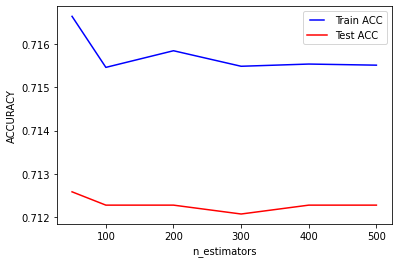

In [ ]:
plott(trainn,testt,estimators,'n_estimators')

It seems **estimators** do not have much effect on accuracy, however we can keep estimators as 200. Lets check the effect with **max_depth**

In [ ]:
train_accur=[]
valid_accur=[]
max_depth1=[4,6,8,10,12,15,18]
for depth in max_depth1:
  _,a,b=random_forest(200,depth)
  train_accur.append(a)
  valid_accur.append(b)
  print("\n")

accuracy 0.7061470798813542
train accuracy 0.7083237437667818


accuracy 0.7142272680781426
train accuracy 0.7164301240250608


accuracy 0.7243530735399407
train accuracy 0.7308016877637131


accuracy 0.7355016876342436
train accuracy 0.7553765503132591


accuracy 0.743581875831032
train accuracy 0.7862933128755913


accuracy 0.747161706044799
train accuracy 0.8429356859736606


accuracy 0.7495141658995602
train accuracy 0.8951540723692623




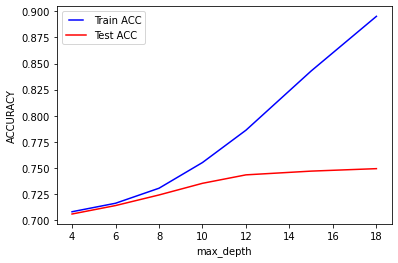

In [ ]:
plott(train_accur,valid_accur,max_depth1,'max_depth')

we observe that incresing the max_depth has a positive effect, But after 12 max_depth validation accuracy is not increasing and is constant, but train accuracy increase drastically that means, it starts overfitting on train data after 12 max_depth of trees. so lets not overfit on train data and choose max_depth=12 & estimators=200

In [ ]:
final_modl,_,_1=random_forest(200,12)

accuracy 0.743581875831032
train accuracy 0.7862933128755913


In [ ]:
print(final_modl)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


Lets try the boosting models

In [ ]:
from xgboost import XGBClassifier
from sklearn import linear_model

In [ ]:
def model_xgb(depth,est,rte):
  modelxg=XGBClassifier(max_depth=depth,learning_rate=rte,n_estimators=est,random_state=0)
  modelxg.fit(X_train,y_train,early_stopping_rounds=5,eval_set=[(X_test,y_test)],verbose=False)
  pred_tr=modelxg.predict(X_train)
  pred=modelxg.predict(X_test)
  valid_acc=metrics.accuracy_score(y_test,pred)
  train_acc=metrics.accuracy_score(y_train,pred_tr)
  print("accuracy",metrics.accuracy_score(y_test,pred))
  #print('auc',metrics.roc_auc_score(y_test,pred))
  print("train accuracy",metrics.accuracy_score(y_train,pred_tr))
  return modelxg,train_acc,valid_acc

We will check tune parameter max_depth, as here n_estimators will be automatically fixed to the best because i am using early stopping

In [ ]:
train_accuracy=[]
valid_accuracy=[]
max_depth=[4,6,8,10,12,15]
for depth in max_depth:
  _,a,b=model_xgb(depth,500,0.1)
  train_accuracy.append(a)
  valid_accuracy.append(b)
  print("\n")

accuracy 0.710749718727626
train accuracy 0.7129267357115459


accuracy 0.736013091950496
train accuracy 0.7475003196522184


accuracy 0.75155978316457
train accuracy 0.7747346886587393


accuracy 0.74317275237803
train accuracy 0.778570515279376


accuracy 0.758105758412601
train accuracy 0.8394067254826748


accuracy 0.751355221438069
train accuracy 0.8484337041299067




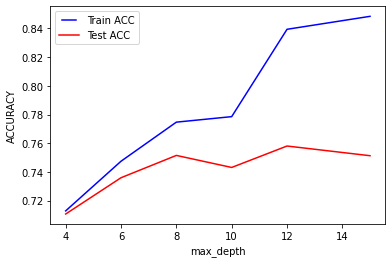

In [ ]:
plott(train_accuracy,valid_accuracy,max_depth,'max_depth')

In [ ]:
learning_rate=[0.05,0.01,0.1,0.15]
tr=[]
tes=[]
for lr in learning_rate:
  _,a,b=model_xgb(12,500,lr)
  tr.append(a)
  tes.append(b)
  print("\n")

accuracy 0.7492073233098088
train accuracy 0.8079785193709245


accuracy 0.7358085302239951
train accuracy 0.7764480245492904


accuracy 0.758105758412601
train accuracy 0.8394067254826748


accuracy 0.7579011966861
train accuracy 0.8394322976601457




Lets check the change in accuracy with learning rate, it is evident below that 0.1 is optimal


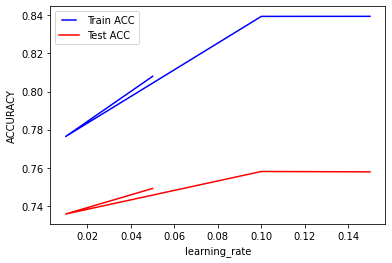

In [ ]:
plott(tr,tes,learning_rate,'learning_rate')

In [ ]:
final_model2,_,_1=model_xgb(12,500,0.1)

accuracy 0.7540145238825816
train accuracy 0.8266717811021609


In [ ]:
print(final_model2)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


The problem with the above appoach is testing new data and figuring the category to which the belong if the data has features categories which are unseen before. so lets try with including rare category in our data, so that it can work with new data even if they have new feature category. let describe each category as rare if its count is less than 5 in dataset or is unseen before.